In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [14]:
df = pd.read_excel("../data/coalpublic2016.xls", header=2, index_col="MSHA ID")

In [29]:
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2016,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,37786,6,14235
103246,2016,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Yellowhammer Energy Solutions,","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,43155,21,13278
103451,2016,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,22218,19,11158
100329,2016,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,43,93811
100627,2016,Flat Top Mine,Alabama,Jefferson,Active,Surface,Independent Producer Operator,Mine only,"Cedar Lake Mining, Inc","7802 Highway 78, Cordova, AL 35550",NaN,Appalachia Southern,281668,46,126268


In [24]:
df['Company Type'].unique()

array(['Independent Producer Operator', 'Operating Subsidiary',
       'Contractor'], dtype=object)

In [26]:
df['Company Type'].replace('Indepedent Producer Operator', 
                           value='Independent Producer Operator', inplace=True)

AttributeError: 'NoneType' object has no attribute 'head'

In [27]:
df['Company Type'].head()

MSHA ID
103381    Independent Producer Operator
103246    Independent Producer Operator
103451    Independent Producer Operator
100329             Operating Subsidiary
100627    Independent Producer Operator
Name: Company Type, dtype: object

In [28]:
#rename the columns, replace all the spaces with underscore
df.rename(columns= lambda x: x.replace(" ", "_"), inplace=True)

In [30]:
# check the number of lines in the dataframe

len(df)

993

Text(0,0.5,'Total Hours Worked')

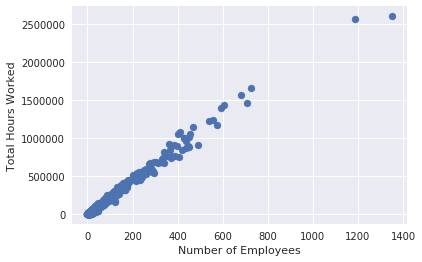

In [35]:
plt.scatter(df.Average_Employees, df.Labor_Hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked")

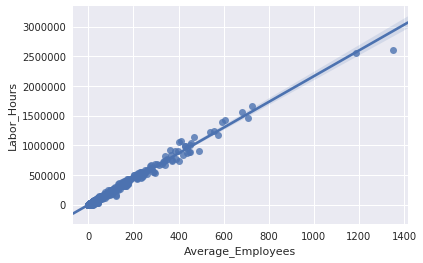

In [37]:
sns.regplot(df.Average_Employees, df.Labor_Hours)
plt.savefig("../figures/2018-03-20" + "-employees_vs_hours.png")

In [41]:
for column in df.columns:
    print(column)

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours


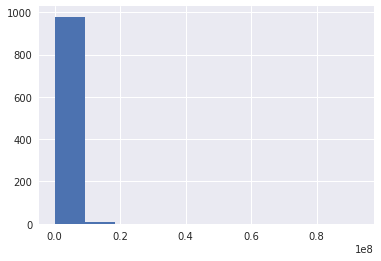

In [51]:
df['Production_(short_tons)'].hist()

In [52]:
# we are removing data here
df = df[df['Production_(short_tons)']>0]

In [56]:
df['log_production'] = np.log(df['Production_(short_tons)'])

710

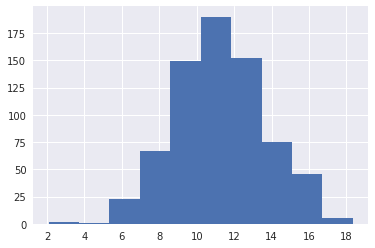

In [57]:
df['log_production'].hist()
len(df)

In [58]:
df.to_csv("../data/clean_coalpublic2016.csv")